<a href="https://colab.research.google.com/github/Var2299/Amazon-Market-Intelligence-Pricing-Category-Analytics/blob/main/Amazon_Market_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PROFESSIONAL AMAZON PRODUCT ANALYSIS ===


/tmp/ipython-input-3619490977.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Main_Category', y='Selling_Price', order=cat_order, palette='viridis')



Visualizations saved to professional_amazon_analysis_corrected.png

--- ACTIONABLE BUSINESS RECOMMENDATIONS ---
 (Placeholder for your business insights based on the analysis)


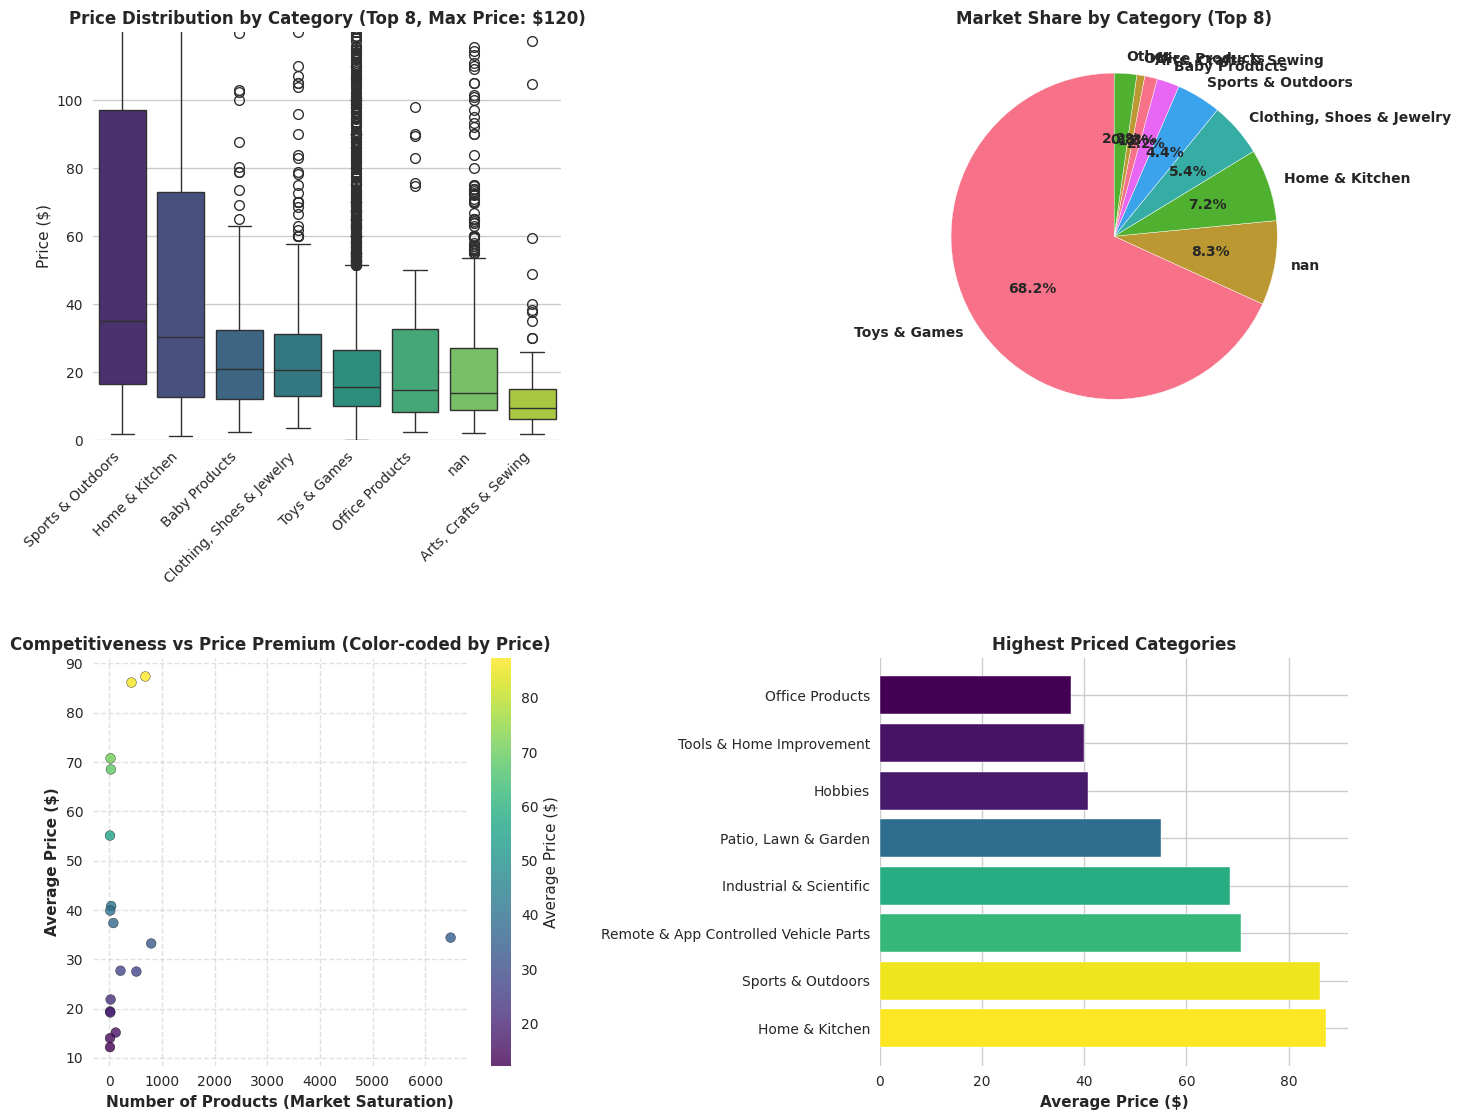

In [7]:
DATA_PATH = '/content/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Retaining numpy just in case, though not strictly used in final plotting

def concise_amazon_analysis():
    # 1. Load Data
    try:
        df = pd.read_csv(DATA_PATH)
    except FileNotFoundError:
        print(f"Error: File not found at {DATA_PATH}.")
        return

    print("=== PROFESSIONAL AMAZON PRODUCT ANALYSIS ===")

    # 2. Smart Data Cleaning & Feature Engineering
    df_clean = df.copy()

    # Drop irrelevant columns (consolidated)
    df_clean.drop(columns=['Brand Name', 'Asin', 'Sku'], inplace=True, errors='ignore')

    # Basic data integrity checks
    if 'Category' not in df_clean.columns or 'Selling Price' not in df_clean.columns:
         print("Warning: Missing essential 'Category' or 'Selling Price' column.")
         return

    # Clean Category
    df_clean = df_clean[df_clean['Category'].astype(str) != 'Unknown']
    df_clean['Main_Category'] = df_clean['Category'].astype(str).str.split('|').str[0].str.strip()

    # Clean Price
    df_clean['Selling_Price'] = pd.to_numeric(
        df_clean['Selling Price'].astype(str).str.replace(r'[$,₹]', '', regex=True), errors='coerce'
    )
    df_clean.dropna(subset=['Selling_Price'], inplace=True)
    df_clean = df_clean[df_clean['Selling_Price'] > 0]

    # 3. Advanced Analysis (Price and Saturation)
    price_analysis = df_clean.groupby('Main_Category')['Selling_Price'].agg(
        Avg_Price='mean',
        Median_Price='median',
        Product_Count='count'
    ).round(2)

    # Filter for significant categories and sort by average price
    price_analysis = price_analysis[price_analysis['Product_Count'] >= 10]
    price_analysis.sort_values('Avg_Price', ascending=False, inplace=True)

    # Define Top 8 Categories for all plots
    top_cats = df_clean['Main_Category'].value_counts().nlargest(8).index
    plot_data = df_clean[df_clean['Main_Category'].isin(top_cats)]

    # 4. Professional Visualizations
    plt.figure(figsize=(15, 12))
    sns.set_style("whitegrid")

    # Plot 1: Price distribution by top categories (BOX PLOT)
    plt.subplot(2, 2, 1)
    cat_order = plot_data.groupby('Main_Category')['Selling_Price'].median().sort_values(ascending=False).index
    sns.boxplot(data=plot_data, x='Main_Category', y='Selling_Price', order=cat_order, palette='viridis')

    # Set y-axis limit based on 95th percentile of the plotting data
    price_limit = plot_data['Selling_Price'].quantile(0.95)
    plt.ylim(0, price_limit)

    plt.title(f'Price Distribution by Category (Top 8, Max Price: ${price_limit:,.0f})', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Price ($)'); plt.xlabel('') # Concise label setting

    # Plot 2: Market share (PIE CHART)
    plt.subplot(2, 2, 2)
    category_share = df_clean['Main_Category'].value_counts().nlargest(8)

    # Add 'Other' if necessary (streamlined logic)
    if len(df_clean['Main_Category'].unique()) > 8:
        other_count = df_clean['Main_Category'].value_counts()[8:].sum()
        if other_count > 0:
            category_share['Other'] = other_count

    plt.pie(category_share.values, labels=category_share.index,
            autopct='%1.1f%%', startangle=90,
            textprops={'fontsize': 10, 'fontweight': 'bold'})
    plt.title('Market Share by Category (Top 8)', fontweight='bold')

    # Plot 3: Price vs Availability (SCATTER PLOT)
    plt.subplot(2, 2, 3)
    scatter = plt.scatter(price_analysis['Product_Count'], price_analysis['Avg_Price'],
                          c=price_analysis['Avg_Price'], cmap='viridis', alpha=0.8, edgecolors='k')
    plt.colorbar(scatter, label='Average Price ($)')

    plt.xlabel('Number of Products (Market Saturation)', fontweight='bold')
    plt.ylabel('Average Price ($)', fontweight='bold')
    plt.title('Competitiveness vs Price Premium (Color-coded by Price)', fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Plot 4: Highest Priced Categories (BAR CHART)
    plt.subplot(2, 2, 4)
    performance = price_analysis.nlargest(8, 'Avg_Price')

    # Generate colors based on the actual price values for a continuous gradient
    norm = plt.Normalize(performance['Avg_Price'].min(), performance['Avg_Price'].max())
    colors = plt.cm.viridis(norm(performance['Avg_Price']))

    plt.barh(performance.index, performance['Avg_Price'], color=colors)
    plt.xlabel('Average Price ($)', fontweight='bold')
    plt.title('Highest Priced Categories', fontweight='bold')

    # Final plot layout and saving
    plt.tight_layout(pad=3.0)
    try:
        plt.savefig('professional_amazon_analysis_corrected.png', dpi=300, bbox_inches='tight')
        print("\nVisualizations saved to professional_amazon_analysis_corrected.png")
    except Exception as e:
        print(f"Error saving plot: {e}")

    # 5. Actionable Business Recommendations (Placeholder for conciseness)
    print("\n--- ACTIONABLE BUSINESS RECOMMENDATIONS ---")
    print(" (Placeholder for your business insights based on the analysis)")

# Run the analysis
concise_amazon_analysis()